In [3]:
import sys
sys.path.append('/raven/u/ajagadish/vanilla-llama/categorisation/')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch
FONTSIZE=15

In [4]:
# set plotting parameters
COLORS = {'a':'#117733', 
          'b':'#96CAA7',
          'lr':'#88CCEE',#882255
          'svm':'#CC6677',
          'optimal': '#D6BF4D',
          'feature_1':'#882255', #332288
          'people':'#882255', #AA4499',
          'stats':'#44AA99', 
          'feature_2':'#44AA99',
          'simple_grammar_constrained_noncompositonal':'#EF9EBB',
          'feature_3':'#E2C294', #'#0571D0', 
          'metal':'#DA9138', #"#D55E00", 
          'people2': '#748995',
          'metal2': '#173b4f',
          }
FONTSIZE=16

## devraj 2022



In [5]:
#!pip install groupBMC==1.0
from groupBMC.groupBMC import GroupBMC

In [6]:
def posterior_model_frequency(bics, models, horizontal=True, FIGSIZE=(5,5), FONTSIZE=25, task_name=None):
    result = {}
    LogEvidence = np.stack(-bics/2)
    result['composed'] = GroupBMC(LogEvidence).get_result()

    # rename models for plot
    colors = ['#173b4f', '#8b9da7', '#5d7684', '#2f4a5a', '#0d2c3d', '#4d6a75', '#748995']

    f, ax = plt.subplots(1, 1, figsize=FIGSIZE)

    if horizontal:
        # composed
        ax.barh(np.arange(len(models)), result['composed'].frequency_mean, xerr=result['composed'].frequency_var, align='center', color=colors, height=0.6)#, edgecolor='k')#, hatch='//', label='Compostional Subtask')
        # plt.legend(fontsize=FONTSIZE-4, frameon=False)
        ax.set_ylabel('Models', fontsize=FONTSIZE)
        # ax.set_xlim(0, 0.7)
        ax.set_xlabel('Posterior model frequency', fontsize=FONTSIZE) 
        plt.yticks(ticks=np.arange(len(models)), labels=models, fontsize=FONTSIZE-3.)
        ax.set_xticks(np.arange(0, result['composed'].frequency_mean.max(), 0.1))
        plt.xticks(fontsize=FONTSIZE-4)
    else:
        # composed
        ax.bar( np.arange(len(models))-0.22, result['composed'].frequency_mean, align='center', color='w', width=0.4, edgecolor='k', hatch='//', label='Compostional Subtask')
        ax.errorbar(np.arange(len(models))-0.22, result['composed'].frequency_mean, result['composed'].frequency_var, c='red',fmt='.r', lw=3)
        # plt.legend(fontsize=FONTSIZE, frameon=False)
        ax.set_xlabel('Models', fontsize=FONTSIZE)
        ax.set_ylim(0, 0.7)
        ax.set_ylabel('Posterior model frequency', fontsize=FONTSIZE) 
        plt.xticks(ticks=np.arange(len(models)), labels=models, fontsize=FONTSIZE-3.)#, rotation=45)
        plt.yticks(fontsize=FONTSIZE-4)

    ax.set_title(f'{task_name}', fontsize=FONTSIZE-5)
    sns.despine()
    f.tight_layout()
    #f.savefig('/u/ajagadish/compositional-reinforcement-learning/figs/PLOS/PosteriorModelFrequency_MLLS_{}_{}.svg'.format(fit_subtasks, rule), bbox_inches = 'tight')
    plt.show()

In [7]:
def exceedance_probability(bics, models, horizontal=True, FIGSIZE=(5,5), FONTSIZE=25, task_name=None):
    result = {}
    LogEvidence = np.stack(-bics/2)
    result['composed'] = GroupBMC(LogEvidence).get_result()

    # rename models for plot
    colors = ['#173b4f', '#8b9da7', '#5d7684', '#2f4a5a', '#0d2c3d', '#4d6a75', '#748995']

    f, ax = plt.subplots(1, 1, figsize=FIGSIZE)
    if horizontal:
        # composed
        ax.barh(np.arange(len(models)), result['composed'].exceedance_probability, align='center', color=colors, height=0.6)#, hatch='//', label='Compostional Subtask')
        # plt.legend(fontsize=FONTSIZE-4, frameon=False)
        ax.set_ylabel('Models', fontsize=FONTSIZE)
        # ax.set_xlim(0, 0.7)
        ax.set_xlabel('Exceedance probability', fontsize=FONTSIZE) 
        plt.yticks(ticks=np.arange(len(models)), labels=models, fontsize=FONTSIZE-3.)
        # ax.set_xticks(np.arange(0, result['composed'].exceedance_probability.max(), 0.1))
        plt.xticks(fontsize=FONTSIZE-4)
    else:
        # composed
        ax.bar( np.arange(len(models))-0.22, result['composed'].exceedance_probability, align='center', color=colors, width=0.4, edgecolor='k')#, hatch='//', label='Compostional Subtask')
        # plt.legend(fontsize=FONTSIZE, frameon=False)
        ax.set_xlabel('Models', fontsize=FONTSIZE)
        ax.set_ylim(0, 0.7)
        ax.set_ylabel('Exceedance probability', fontsize=FONTSIZE) 
        plt.xticks(ticks=np.arange(len(models)), labels=models, fontsize=FONTSIZE-5.5)#, rotation=45)
        plt.yticks(fontsize=FONTSIZE-2)
    
    ax.set_title(f'{task_name}', fontsize=FONTSIZE-5)
    sns.despine()
    f.tight_layout()
    #f.savefig('/u/ajagadish/compositional-reinforcement-learning/figs/PLOS/PosteriorModelFrequency_MLLS_{}_{}.svg'.format(fit_subtasks, rule), bbox_inches = 'tight')
    plt.show()

In [8]:
new_df = pd.read_csv('../data/human/devraj2022rational.csv')
# keep only control conditions
new_df = new_df[new_df['condition']=='control']
# compute accuracy each participant over trial segments using new dataframe
accuracy = []
for participant_id in new_df.participant.unique():
    new_df_participant = new_df[new_df.participant==participant_id]
    participant_acc = []
    for trial_segment in new_df_participant.trial_segment.unique():
        new_df_participant_trial_segment = new_df_participant[new_df_participant.trial_segment==trial_segment]
        participant_acc.append(np.sum(new_df_participant_trial_segment.choice.values==new_df_participant_trial_segment.correct_choice.values)/len(new_df_participant_trial_segment))
    accuracy.append(participant_acc)
    
keep_participants = (np.stack(accuracy).mean(1)>0.60)
num_participants = keep_participants.sum()

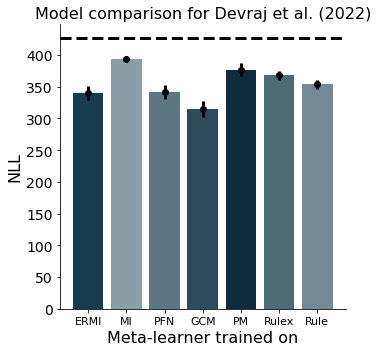

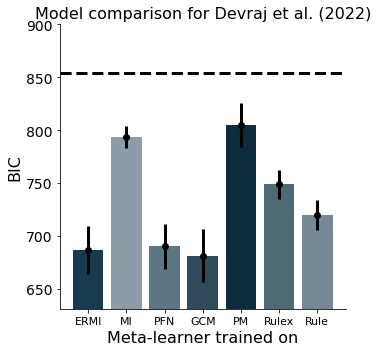

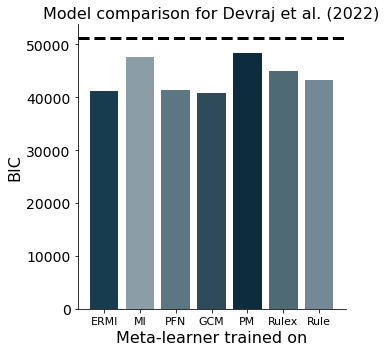

In [10]:
models = ['devraj2022_env=claude_generated_tasks_paramsNA_dim6_data500_tasks12910_pversion5_stage2_model=transformer_num_episodes500000_num_hidden=256_lr0.0003_num_layers=6_d_model=64_num_head=8_noise0.0_shuffleTrue_run=1_soft_sigmoid_differential_evolution', \
          'devraj2022_env=dim6synthetic_model=transformer_num_episodes500000_num_hidden=256_lr0.0003_num_layers=6_d_model=64_num_head=8_noise0.0_shuffleTrue_run=2_synthetic_soft_sigmoid_differential_evolution', \
          'devraj2022_env=dim6synthetic_model=transformer_num_episodes500000_num_hidden=256_lr0.0003_num_layers=6_d_model=64_num_head=8_noise0.0_shuffleTrue_run=2_syntheticnonlinear_soft_sigmoid_differential_evolution',\
          'devraj2022_gcm_runs=1_iters=1_blocks=1_loss=nll',\
          'devraj2022_pm_runs=1_iters=1_blocks=1_loss=nll',\
          'devraj2022_rulex_runs=1_iters=1_blocks=1_loss=nll_exception=True', \
          'devraj2022_rulex_runs=1_iters=1_blocks=1_loss=nll_exception=False', 
         ]
task_name = 'Devraj et al. (2022)'
# models = [model + "_true" for model in models]
# models = [model + "_random" for model in models]

nlls,fitted_betas, r2s = [], [], []
model_accs = []
bics = []
num_trials = 616
num_tasks = 1

for model_name in models:
    fits =  np.load(f'../data/model_comparison/{model_name}.npz')
    if 'model=transformer' in model_name:
        betas, pnlls, pr2s = fits['betas'], fits['nlls'], fits['pr2s']
        model_accs.append(fits['accs'].max(0).mean())
        nlls_min_nlls = np.array(pnlls).squeeze()
        pr2s_min_nll = np.array(pr2s).squeeze()
        fitted_betas.append(betas)
        ## CHANGED HERE for diff evolution
        # pr2s = np.array(pr2s)
        # min_nll_index = np.argmin(np.stack(pnlls), 0)
        # pr2s_min_nll = np.stack([pr2s[min_nll_index[idx], idx] for idx in range(pr2s.shape[1])])
        # nlls_min_nlls = np.stack([pnlls[min_nll_index[idx], idx] for idx in range(pnlls.shape[1])])
        # fitted_betas.append(betas[min_nll_index])
        bic = np.array(nlls_min_nlls)*2 + np.log(num_trials)*1
    elif ('gcm' in model_name) or ('pm' in model_name):
        betas, pnlls, pr2s = fits['params'], fits['lls'], fits['r2s']
        nlls_min_nlls = np.array(pnlls).squeeze()
        pr2s_min_nll = np.array(pr2s).squeeze()
        ## CHANGED HERE to fix parameters for badham task which has 4 conditions
        num_parameters = 8*num_tasks 
        bic = np.array(nlls_min_nlls)*2 + np.log(num_trials)*num_parameters
        fitted_betas.append(betas.squeeze()[:, 1])
    elif ('rulex' in model_name):
        betas, pnlls, pr2s = fits['params'], fits['lls'], fits['r2s']
        nlls_min_nlls = np.array(pnlls).squeeze()
        pr2s_min_nll = np.array(pr2s).squeeze()
        num_parameters = 2*num_tasks
        bic = np.array(nlls_min_nlls)*2 + np.log(num_trials)*num_parameters

    nlls.append(nlls_min_nlls)
    r2s.append(pr2s_min_nll)
    bics.append(bic)

num_participants = len(nlls[0])
MODELS = ['ERMI', 'MI', 'PFN', 'GCM', 'PM', 'Rulex', 'Rule']
MODELS = MODELS[:len(nlls)]
# set colors depending on number of models in MODELS
colors = ['#173b4f', '#8b9da7', '#5d7684', '#2f4a5a', '#0d2c3d', '#4d6a75', '#748995']
## compare mean nlls across models in a bar plot
f, ax = plt.subplots(1, 1, figsize=(5,5))
bar_positions = np.arange(len(nlls))*0.5
ax.bar(bar_positions, np.array(nlls).mean(1), color=colors, width=0.4)
ax.errorbar(bar_positions, np.array(nlls).mean(1), yerr=np.array(nlls).std(1)/np.sqrt(num_participants-1), c='k', lw=3, fmt="o")
# add chance level line for 616 trials with binary choices
ax.axhline(y=-np.log(0.5)*num_trials, color='k', linestyle='--', lw=3)
ax.set_xlabel('Meta-learner trained on', fontsize=FONTSIZE)
ax.set_ylabel('NLL', fontsize=FONTSIZE)
ax.set_xticks(bar_positions)  # Set x-tick positions to bar_positions
ax.set_xticklabels(MODELS, fontsize=FONTSIZE-5)  # Assign category names to x-tick labels
ax.set_title(f'Model comparison for Devraj et al. (2022)', fontsize=FONTSIZE)
# plt.xticks(fontsize=FONTSIZE-2)
plt.yticks(fontsize=FONTSIZE-2)
sns.despine()
f.tight_layout()
plt.show()

# compare mean bics across models in a bar plot
#bics = np.array(bics)[:, keep_participants]
f, ax = plt.subplots(1, 1, figsize=(5,5))
bar_positions = np.arange(len(bics))*0.5
ax.bar(bar_positions, np.array(bics).mean(1), color=colors, width=0.4)
ax.errorbar(bar_positions, np.array(bics).mean(1), yerr=np.array(bics).std(1)/np.sqrt(num_participants-1), c='k', lw=3, fmt="o")
# add chance level line for 616 trials with binary choices
ax.axhline(y=-np.log(0.5)*num_trials*2, color='k', linestyle='--', lw=3)
ax.set_xlabel('Meta-learner trained on', fontsize=FONTSIZE)
ax.set_ylabel('BIC', fontsize=FONTSIZE)
ax.set_xticks(bar_positions)  # Set x-tick positions to bar_positions
ax.set_xticklabels(MODELS, fontsize=FONTSIZE-5)  # Assign category names to x-tick labels
ax.set_title(f'Model comparison for Devraj et al. (2022)', fontsize=FONTSIZE)
ax.set_ylim([np.array(bics).mean(1).min()-50, 900])
# plt.xticks(fontsize=FONTSIZE-2)
plt.yticks(fontsize=FONTSIZE-2)
sns.despine()
f.tight_layout()
plt.show()

#bics = np.array(bics)[:, keep_participants]
f, ax = plt.subplots(1, 1, figsize=(5,5))
bar_positions = np.arange(len(bics))*0.5
ax.bar(bar_positions, np.array(bics).sum(1), color=colors, width=0.4)
#ax.errorbar(bar_positions, np.array(bics).mean(1), yerr=np.array(bics).std(1)/np.sqrt(num_participants-1), c='k', lw=3, fmt="o")
# add chance level line for 616 trials with binary choices
ax.axhline(y=-np.log(0.5)*num_trials*2*num_participants, color='k', linestyle='--', lw=3)
ax.set_xlabel('Meta-learner trained on', fontsize=FONTSIZE)
ax.set_ylabel('BIC', fontsize=FONTSIZE)
ax.set_xticks(bar_positions)  # Set x-tick positions to bar_positions
ax.set_xticklabels(MODELS, fontsize=FONTSIZE-5)  # Assign category names to x-tick labels
ax.set_title(f'Model comparison for Devraj et al. (2022)', fontsize=FONTSIZE)
# ax.set_ylim([np.array(bics).mean(1).min()-50, 900])
# plt.xticks(fontsize=FONTSIZE-2)
plt.yticks(fontsize=FONTSIZE-2)
sns.despine()
f.tight_layout()
plt.show()

# num_participants = len(nlls[0])
# # compare mean r2s across models in a bar plot
# f, ax = plt.subplots(1, 1, figsize=(5,5))
# bar_positions = np.arange(len(r2s))*0.5
# ax.bar(bar_positions, np.array(r2s).mean(1), color=colors, width=0.4)
# ax.errorbar(bar_positions, np.array(r2s).mean(1), yerr=np.array(r2s).std(1)/np.sqrt(num_participants-1), c='k', lw=3, fmt="o")
# ax.set_xlabel('Meta-learner trained on', fontsize=FONTSIZE)
# ax.set_ylabel('R2', fontsize=FONTSIZE)
# ax.set_xticks(bar_positions)  # Set x-tick positions to bar_positions
# ax.set_xticklabels(MODELS, fontsize=FONTSIZE-5)  # Assign category names to x-tick labels
# ax.set_title(f'Model comparison for Devraj et al. (2022)', fontsize=FONTSIZE)
# plt.yticks(fontsize=FONTSIZE-2)
# sns.despine()
# f.tight_layout()
# plt.show()

In [13]:
MODELS, np.array(nlls).mean(1), np.array(nlls).std(1)/np.sqrt(num_participants-1)

(['ERMI', 'MI', 'PFN', 'GCM', 'PM', 'Rulex', 'Rule'],
 array([340.18171173, 393.59740247, 341.89668824, 314.9258936 ,
        376.77501961, 367.95023854, 353.58805126]),
 array([11.48772627,  5.09278791, 10.5889379 , 12.54244655, 10.32139855,
         6.65897486,  7.16012603]))

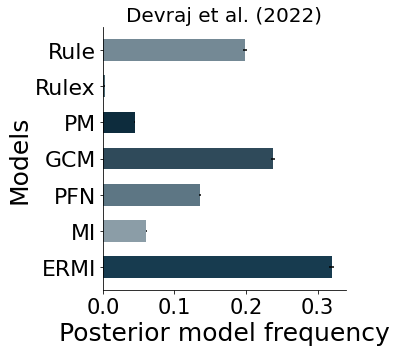

In [8]:
posterior_model_frequency(np.array(bics), MODELS, task_name=task_name)

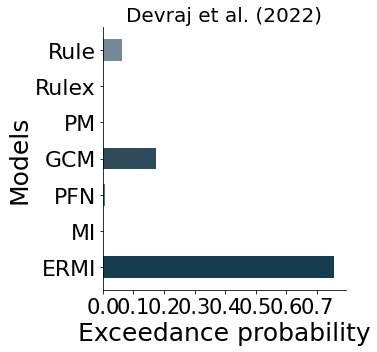

In [9]:
exceedance_probability(np.array(bics), MODELS, task_name=task_name)

#### overfitting to true or randomm

In [74]:
model_accs

[0.9237013, 0.66233766, 0.862013]

IndexError: list index out of range

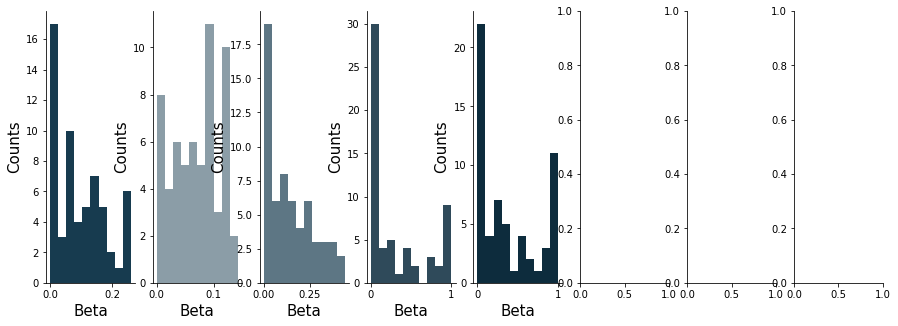

In [76]:
f, ax = plt.subplots(1, len(models)+1, figsize=(15,5))
# colors = ['#173b4f', '#8b9da7', '#5d7684']
for m_idx, model in enumerate(models):
    ax[m_idx].hist(fitted_betas[m_idx], color=colors[m_idx])
    ax[m_idx].set_xlabel('Beta', fontsize=FONTSIZE)
    ax[m_idx].set_ylabel('Counts', fontsize=FONTSIZE)
    sns.despine()
plt.show()

## badham et al. 2017

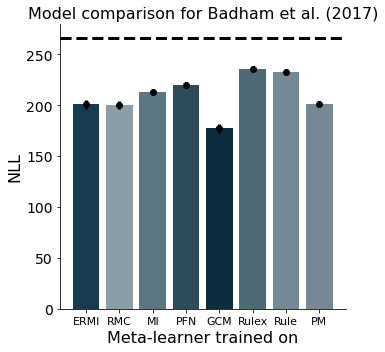

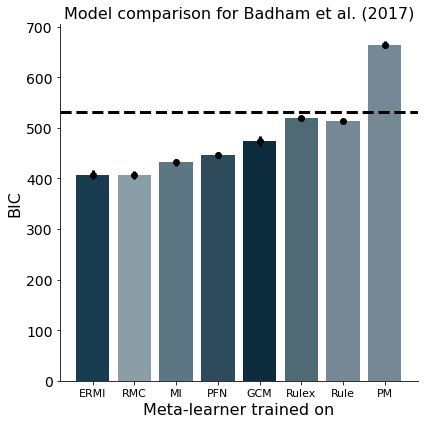

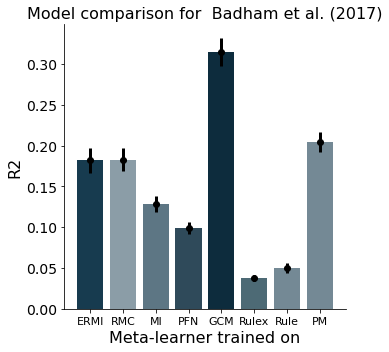

In [14]:
models = ['badham2017_env=claude_generated_tasks_paramsNA_dim3_data100_tasks11518_pversion4_model=transformer_num_episodes500000_num_hidden=256_lr0.0003_num_layers=6_d_model=64_num_head=8_noise0.0_shuffleTrue_run=0_soft_sigmoid_differential_evolution',\
          'badham2017_env=rmc_tasks_dim3_data100_tasks11499_model=transformer_num_episodes500000_num_hidden=256_lr0.0003_num_layers=6_d_model=64_num_head=8_noise0.0_shuffleTrue_run=1_rmc_soft_sigmoid_differential_evolution',
            'badham2017_env=dim3synthetic_model=transformer_num_episodes500000_num_hidden=256_lr0.0003_num_layers=6_d_model=64_num_head=8_noise0.0_shuffleTrue_run=0_syntheticnonlinear_soft_sigmoid_differential_evolution',\
            'badham2017_env=dim3synthetic_model=transformer_num_episodes500000_num_hidden=256_lr0.0003_num_layers=6_d_model=64_num_head=8_noise0.0_shuffleTrue_run=0_synthetic_soft_sigmoid_differential_evolution',\
            'badham2017_gcm_runs=1_iters=1_blocks=1_loss=nll',\
            'badham2017_rulex_runs=1_iters=1_blocks=1_loss=nll_exception=True',\
            'badham2017_rulex_runs=1_iters=1_blocks=1_loss=nll_exception=False',\
            'badham2017_pm_runs=1_iters=1_blocks=1_loss=nll',\
         ]
nlls,fitted_betas, r2s = [], [], []
model_accs = []
bics = []
num_tasks = 4
num_trials = 96*num_tasks
task_name = 'Badham et al. (2017)'
for model_name in models:
    fits =  np.load(f'../data/model_comparison/{model_name}.npz')
    if 'model=transformer' in model_name:
        betas, pnlls, pr2s = fits['betas'], fits['nlls'], fits['pr2s']
        model_accs.append(fits['accs'].max(0).mean())
        nlls_min_nlls = np.array(pnlls).squeeze()
        pr2s_min_nll = np.array(pr2s).squeeze()
        fitted_betas.append(betas)
        ## (deprecated) grid search-based nlls
        # model_accs.append(fits['accs'].max(0).mean())
        # pr2s = np.array(pr2s)
        # min_nll_index = np.argmin(np.stack(pnlls), 0)
        # pr2s_min_nll = np.stack([pr2s[min_nll_index[idx], idx] for idx in range(pr2s.shape[1])])
        # nlls_min_nlls = np.stack([pnlls[min_nll_index[idx], idx] for idx in range(pnlls.shape[1])])
        # fitted_betas.append(betas[min_nll_index])
        bic = np.array(nlls_min_nlls)*2 + np.log(num_trials)*1
    elif ('gcm' in model_name) or ('pm' in model_name):
        betas, pnlls, pr2s = fits['params'], fits['lls'], fits['r2s']
        #TODO: note that here I summing the fits across the four conditions fit separately
        nlls_min_nlls = np.array(pnlls).squeeze().sum(1)
        pr2s_min_nll = np.array(pr2s).squeeze().mean(1)
        num_parameters = 5*num_tasks if ('gcm' in model_name) else 11*num_tasks
        bic = np.array(nlls_min_nlls)*2 + np.log(num_trials)*num_parameters
        fitted_betas.append(betas.squeeze()[..., 1].mean(1))
    elif ('rulex' in model_name):
        betas, pnlls, pr2s = fits['params'], fits['lls'], fits['r2s']
        nlls_min_nlls = np.array(pnlls).squeeze().sum(1)
        pr2s_min_nll = np.array(pr2s).squeeze().mean(1)
        num_parameters = 2*num_tasks
        bic = np.array(nlls_min_nlls)*2 + np.log(num_trials)*num_parameters

    nlls.append(nlls_min_nlls)
    r2s.append(pr2s_min_nll)
    bics.append(bic)

num_participants = len(nlls[0])
MODELS = ['ERMI', 'RMC', 'MI', 'PFN', 'GCM', 'Rulex', 'Rule',  'PM']
MODELS = MODELS[:len(nlls)]
# set colors depending on number of models in MODELS
colors = ['#173b4f', '#8b9da7', '#5d7684', '#2f4a5a', '#0d2c3d', '#4d6a75', '#748995', '#748995']
# compare mean nlls across models in a bar plot
f, ax = plt.subplots(1, 1, figsize=(5,5))
bar_positions = np.arange(len(nlls))*0.5

ax.bar(bar_positions, np.array(nlls).mean(1), color=colors, width=0.4)
ax.errorbar(bar_positions, np.array(nlls).mean(1), yerr=np.array(nlls).std(1)/np.sqrt(num_participants-1), c='k', lw=3, fmt="o")
# add chance level line for 616 trials with binary choices
ax.axhline(y=-np.log(0.5)*num_trials, color='k', linestyle='--', lw=3)
ax.set_xlabel('Meta-learner trained on', fontsize=FONTSIZE)
ax.set_ylabel('NLL', fontsize=FONTSIZE)
ax.set_xticks(bar_positions)  # Set x-tick positions to bar_positions
ax.set_xticklabels(MODELS, fontsize=FONTSIZE-5)  # Assign category names to x-tick labels
ax.set_title(f'Model comparison for Badham et al. (2017)', fontsize=FONTSIZE)
# plt.xticks(fontsize=FONTSIZE-2)
plt.yticks(fontsize=FONTSIZE-2)
sns.despine()
f.tight_layout()
plt.show()

# compare mean nlls across models in a bar plot
f, ax = plt.subplots(1, 1, figsize=(6,6))
bar_positions = np.arange(len(bics))*0.5
ax.bar(bar_positions, np.array(bics).mean(1), color=colors, width=0.4)
ax.errorbar(bar_positions, np.array(bics).mean(1), yerr=np.array(bics).std(1)/np.sqrt(num_participants-1), c='k', lw=3, fmt="o")
# add chance level line for 616 trials with binary choices
ax.axhline(y=-np.log(0.5)*num_trials*2, color='k', linestyle='--', lw=3)
ax.set_xlabel('Meta-learner trained on', fontsize=FONTSIZE)
ax.set_ylabel('BIC', fontsize=FONTSIZE)
ax.set_xticks(bar_positions)  # Set x-tick positions to bar_positions
ax.set_xticklabels(MODELS, fontsize=FONTSIZE-5)  # Assign category names to x-tick labels
ax.set_title(f'Model comparison for Badham et al. (2017)', fontsize=FONTSIZE)
# plt.xticks(fontsize=FONTSIZE-2)
plt.yticks(fontsize=FONTSIZE-2)
sns.despine()
f.tight_layout()
plt.show()

num_participants = len(nlls[0])
# compare mean r2s across models in a bar plot
f, ax = plt.subplots(1, 1, figsize=(5,5))
bar_positions = np.arange(len(r2s))*0.5
ax.bar(bar_positions, np.array(r2s).mean(1), color=colors, width=0.4)
ax.errorbar(bar_positions, np.array(r2s).mean(1), yerr=np.array(r2s).std(1)/np.sqrt(num_participants-1), c='k', lw=3, fmt="o")
ax.set_xlabel('Meta-learner trained on', fontsize=FONTSIZE)
ax.set_ylabel('R2', fontsize=FONTSIZE)
ax.set_xticks(bar_positions)  # Set x-tick positions to bar_positions
ax.set_xticklabels(MODELS, fontsize=FONTSIZE-5)  # Assign category names to x-tick labels
ax.set_title(f'Model comparison for  Badham et al. (2017)', fontsize=FONTSIZE)
plt.yticks(fontsize=FONTSIZE-2)
sns.despine()
f.tight_layout()
plt.show()

In [15]:
MODELS, np.array(nlls).mean(1), np.array(nlls).std(1)/np.sqrt(num_participants-1)

(['ERMI', 'RMC', 'MI', 'PFN', 'GCM', 'Rulex', 'Rule', 'PM'],
 array([200.82538452, 200.31471394, 213.12588061, 220.12750444,
        177.35224616, 235.81334457, 232.99472432, 201.19282781]),
 array([4.56347379, 4.25833981, 3.32947195, 2.81803612, 4.70187632,
        2.33235503, 2.43513485, 3.37677608]))

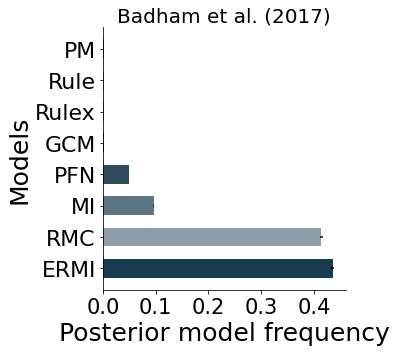

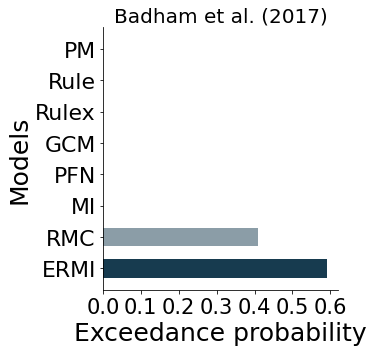

In [179]:
posterior_model_frequency(np.array(bics), MODELS, task_name=task_name)
exceedance_probability(np.array(bics), MODELS, task_name=task_name)

In [15]:
model_accs

[0.8932292]

In [ ]:
np.median(fits['betas'])

0.1581290203119925

In [ ]:
fits['betas'].mean()

0.18564321475504575

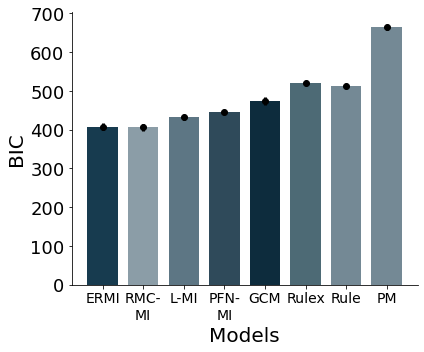

In [26]:
FIGSIZE = (6,5)
FONTSIZE = 20
MODELS = ['ERMI', 'RMC-\nMI', 'L-MI', 'PFN-\nMI', 'GCM', 'Rulex', 'Rule',  'PM']
f, ax = plt.subplots(1, 1, figsize=FIGSIZE)
bar_positions = np.arange(len(bics))*2.
ax.bar(bar_positions, np.array(bics).mean(1), color=colors, width=1.5)
ax.errorbar(bar_positions, np.array(bics).mean(1), yerr=np.array(bics).std(1)/np.sqrt(num_participants-1), c='k', lw=3, fmt="o")
# add chance level line for 616 trials with binary choices
# ax.axhline(y=-np.log(0.5)*num_trials*2, color='k', linestyle='--', lw=3)
ax.set_xlabel('Models', fontsize=FONTSIZE)
ax.set_ylabel('BIC', fontsize=FONTSIZE)
ax.set_xticks(bar_positions)  # Set x-tick positions to bar_positions
ax.set_xticklabels(MODELS, fontsize=FONTSIZE-6)  # Assign category names to x-tick labels
# ax.set_title(f'Model comparison for Badham et al. (2017)', fontsize=FONTSIZE)
# plt.xticks(fontsize=FONTSIZE-2)
plt.yticks(fontsize=FONTSIZE-2)
sns.despine()
f.tight_layout()
plt.show()

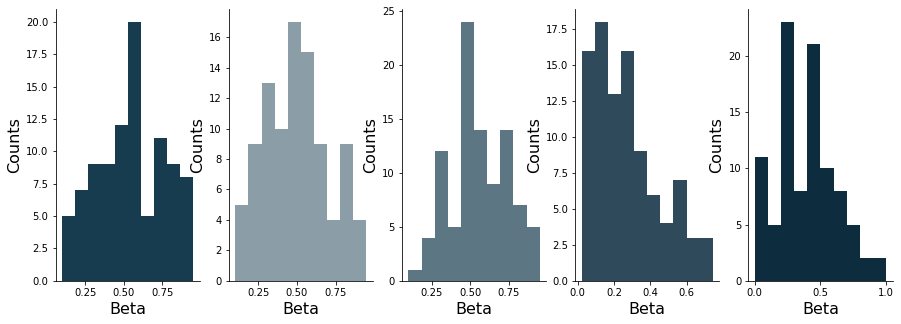

In [55]:
f, ax = plt.subplots(1, len(models), figsize=(15,5))
# colors = ['#173b4f', '#8b9da7', '#5d7684']
for m_idx, model in enumerate(models):
    ax[m_idx].hist(fitted_betas[m_idx], color=colors[m_idx])
    ax[m_idx].set_xlabel('Beta', fontsize=FONTSIZE)
    ax[m_idx].set_ylabel('Counts', fontsize=FONTSIZE)
    sns.despine()
plt.show()

## grid_search: beta sweep, epsilon sweep

In [ ]:
aa.min(0)[[1, 4, 8, 9, 10,]]

array([384.5369873 , 426.97872925, 296.60321045, 373.74916598,
       316.81884766])

In [ ]:
aa.min(0)[[1, 4, 8, 9, 10,]]

array([386.44012, 427.0993 , 305.6636 , 384.58878, 314.12183],
      dtype=float32)

In [ ]:
### optimizer: both, beta, epsgreedy,

In [ ]:
min nll and parameter: (378.1149597167969, array([0.27040436, 0.10773765]))
100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:24<00:00, 24.52s/it]
  0%|                                                                                                                                                                                   | 0/1 [00:00<?, ?it/s]
    min nll and parameter: (426.8493347167969, array([0.981557  , 0.93421689]))
100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:23<00:00, 23.65s/it]
  0%|                                                                                                                                                                                   | 0/1 [00:00<?, ?it/s]
    min nll and parameter: (280.20550537109375, array([0.00565656, 0.14637665]))
100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:51<00:00, 51.82s/it]
  0%|                                                                                                                                                                                   | 0/1 [00:00<?, ?it/s]
    min nll and parameter: (367.2142333984375, array([0.04937384, 0.09254209]))
100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:36<00:00, 36.18s/it]
  0%|                                                                                                                                                                                   | 0/1 [00:00<?, ?it/s]
    min nll and parameter: (304.7475891113281, array([0.07942565, 0.154848  ]))

In [ ]:
  0%|                                                                                                                                                                                   | 0/1 [00:00<?, ?it/s]
    min nll and parameter: (377.52493119239807, array([0.07530501]))
100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:07<00:00,  7.52s/it]
  0%|                                                                                                                                                                                   | 0/1 [00:00<?, ?it/s]
    min nll and parameter: (426.97808837890625, array([0.0003042]))
100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:12<00:00, 12.95s/it]
  0%|                                                                                                                                                                                   | 0/1 [00:00<?, ?it/s]
    min nll and parameter: (279.6707067936659, array([0.1459953]))
100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:20<00:00, 20.72s/it]
  0%|                                                                                                                                                                                   | 0/1 [00:00<?, ?it/s]
    min nll and parameter: (367.0121031999588, array([0.08658644]))
100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:12<00:00, 12.12s/it]
  0%|                                                                                                                                                                                   | 0/1 [00:00<?, ?it/s]
    min nll and parameter: (304.3959814161062, array([0.12927252]))

In [ ]:
min nll and parameter: (386.35345458984375, array([0.64014322]))
100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:05<00:00,  5.11s/it]
  0%|                                                                                                                                                                                   | 0/1 [00:00<?, ?it/s]
    min nll and parameter: (426.8365478515625, array([0.98001848]))
100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:09<00:00,  9.83s/it]
  0%|                                                                                                                                                                                   | 0/1 [00:00<?, ?it/s]
    min nll and parameter: (305.6806640625, array([0.36459244]))
100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:11<00:00, 11.03s/it]
  0%|                                                                                                                                                                                   | 0/1 [00:00<?, ?it/s]
    min nll and parameter: (384.52374267578125, array([0.64556632]))
100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:08<00:00,  8.65s/it]
  0%|                                                                                                                                                                                   | 0/1 [00:00<?, ?it/s]m
    in nll and parameter: (313.13037, array([0.40134269]))

## choosing an optimisation approach

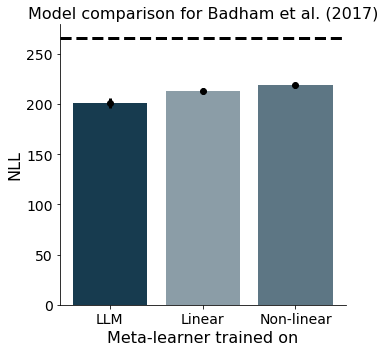

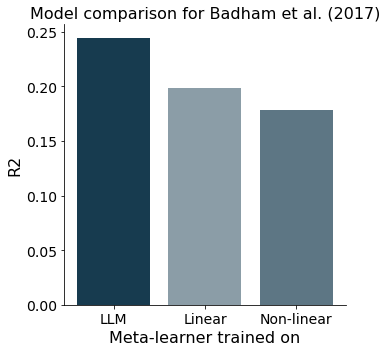

In [ ]:
models = ['badham2017_env=claude_generated_tasks_paramsNA_dim3_data100_tasks11518_pversion4_model=transformer_num_episodes500000_num_hidden=256_lr0.0003_num_layers=6_d_model=64_num_head=8_noise0.0_shuffleTrue_run=0_beta_sweep',\
            'badham2017_env=dim3synthetic_model=transformer_num_episodes500000_num_hidden=256_lr0.0003_num_layers=6_d_model=64_num_head=8_noise0.0_shuffleTrue_run=0_syntheticnonlinear_beta_sweep', \
            'badham2017_env=dim3synthetic_model=transformer_num_episodes500000_num_hidden=256_lr0.0003_num_layers=6_d_model=64_num_head=8_noise0.0_shuffleTrue_run=0_synthetic_beta_sweep']
nlls,fitted_betas, r2s = [], [], []
model_accs = []
for model_name in models:
    fits =  np.load(f'../data/model_comparison/{model_name}.npz')
    betas, pnlls, pr2s = fits['betas'], fits['nlls'], fits['pr2s']
    pr2s = np.array(pr2s)
    min_nll_index = np.argmin(np.stack(pnlls), 0)
    pr2s_min_nll = np.stack([pr2s[min_nll_index[idx], idx] for idx in range(pr2s.shape[1])])
    nlls_min_nlls = np.stack([pnlls[min_nll_index[idx], idx] for idx in range(pnlls.shape[1])])
    nlls.append(nlls_min_nlls)
    r2s.append(pr2s_min_nll)
    fitted_betas.append(betas[min_nll_index])
    model_accs.append(fits['accs'].max(0).mean())

num_participants = len(nlls[0])
# compare mean nlls across models in a bar plot
f, ax = plt.subplots(1, 1, figsize=(5,5))
bar_positions = np.arange(len(nlls))*0.5
colors = ['#173b4f', '#8b9da7', '#5d7684']
ax.bar(bar_positions, np.array(nlls).mean(1), color=colors, width=0.4)
ax.errorbar(bar_positions, np.array(nlls).mean(1), yerr=np.array(nlls).std(1)/np.sqrt(num_participants-1), c='k', lw=3, fmt="o")
# add chance level line for 96*4=384 trials with binary choices
ax.axhline(y=-np.log(0.5)*384, color='k', linestyle='--', lw=3)
ax.set_xlabel('Meta-learner trained on', fontsize=FONTSIZE)
ax.set_ylabel('NLL', fontsize=FONTSIZE)
ax.set_xticks(bar_positions)  # Set x-tick positions to bar_positions
ax.set_xticklabels(['LLM', 'Linear', 'Non-linear'], fontsize=FONTSIZE-2)  # Assign category names to x-tick labels
ax.set_title(f'Model comparison for Badham et al. (2017)', fontsize=FONTSIZE)
plt.xticks(fontsize=FONTSIZE-2)
plt.yticks(fontsize=FONTSIZE-2)
sns.despine()
f.tight_layout()
plt.show()

num_participants = len(nlls[0])
# compare mean nlls across models in a bar plot
f, ax = plt.subplots(1, 1, figsize=(5,5))
bar_positions = np.arange(len(nlls))*0.5
# colors = ['#173b4f', '#8b9da7', '#5d7684']
# ax.bar(bar_positions, np.array(r2s).mean(1), color=colors, width=0.4)
# ax.errorbar(bar_positions, np.array(r2s).mean(1), yerr=np.array(r2s).std(1)/np.sqrt(num_participants-1), c='k', lw=3, fmt="o")
ax.bar(bar_positions, 1-(np.array(nlls).mean(1)/(-np.log(0.5)*384)), color=colors, width=0.4)
ax.set_xlabel('Meta-learner trained on', fontsize=FONTSIZE)
ax.set_ylabel('R2', fontsize=FONTSIZE)
ax.set_xticks(bar_positions)  # Set x-tick positions to bar_positions
ax.set_xticklabels(['LLM', 'Linear', 'Non-linear'], fontsize=FONTSIZE-2)  # Assign category names to x-tick labels
ax.set_title(f'Model comparison for Badham et al. (2017)', fontsize=FONTSIZE)
plt.xticks(fontsize=FONTSIZE-2)
plt.yticks(fontsize=FONTSIZE-2)
sns.despine()
f.tight_layout()
plt.show()

In [15]:
fits =  np.load('../model_comparison/badham2017_env=claude_generated_tasks_paramsNA_dim3_data100_tasks11518_pversion4_model=transformer_num_episodes500000_num_hidden=256_lr0.0003_num_layers=6_d_model=64_num_head=8_noise0.0_shuffleTrue_run=0_beta_sweep.npy.npz')

In [16]:
betas, nlls, pr2s = fits['betas'], fits['nlls'], fits['pr2s']
pr2s = np.array(pr2s)
min_nll_index = np.argmin(np.stack(nlls), 0)
pr2s_min_nll = np.stack([pr2s[min_nll_index[idx], idx] for idx in range(pr2s.shape[1])])
nlls_min_nlls = np.stack([nlls[min_nll_index[idx], idx] for idx in range(nlls.shape[1])])

In [17]:
print(f"beta with min nll: {betas[min_nll_index]}")

beta with min nll: [0.15 0.15 0.1  0.35 0.7  0.65 0.75 0.   0.4  0.75 0.75 0.7  0.85 0.3
 0.75 0.4  0.45 0.95 0.45 0.65 0.9  0.05 0.7  0.3  0.35 0.4  0.9  0.8
 0.8  0.05 0.85 0.25 0.5  0.25 0.5  0.95 0.85 0.2  0.35 0.75 0.8  0.75
 0.85 0.4  0.45 0.85 0.95 0.75 0.65 0.35 0.   0.05 0.85 0.65 0.9  0.1
 0.2  0.   0.1  0.75 0.85 0.7  0.4  0.25 0.5  0.   0.35 0.4  0.25 0.
 0.2  0.2  0.8  0.15 0.95 0.   0.25 0.75 0.7  0.55 0.1  0.55 0.4  0.15
 0.85 0.05 0.9  0.25 0.9  0.95 0.75 0.6  0.95 0.65 0.7 ]


In [33]:
nlls_min_nlls.mean()

229.36994227582687

## prepare badham2017deficits

In [3]:
data = pd.read_csv('../data/human/badham2017deficits.csv')

In [23]:
participant = 0
task_type = 1
categories = {'j': 0, 'f': 1}

In [19]:
data_participant = data[data['participant']==participant]

In [24]:
choices = data_participant[data_participant.condition==task_type].choice

In [25]:
targets = np.array([1. if choice=='j' else 0. for choice in choices])

In [26]:
targets

array([1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0.,
       0., 1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 1., 0., 1., 0., 1.,
       1., 0., 1., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 1., 1., 0.,
       0., 1., 0., 1., 1., 1., 1., 0., 1., 0., 0., 0., 0., 1., 1., 1., 1.,
       0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1., 1.,
       1., 1., 1., 0., 1., 1., 0., 0., 0., 0., 0.])

In [21]:
input_features = [eval(val) for val in data_participant[data_participant.condition==task_type].all_features.values]

In [ ]:
choice = categories[df_trial.choice.item()] if df_trial.choice.item() in categories else df_trial.choice.item()
true_choice = categories[df_trial.correct_choice.item()] if df_trial.correct_choice.item() in categories else df_trial.correct_choice.item()
  